In [2]:
import os
import re

import pandas as pd
import numpy as np

from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'

wv_data_file = 'regression_data_wv_cases1_extra_iv_20210318.csv'
wv_data_file_lg_prov = 'regression_data_wv_cases1_extra_iv_prov_20_20210318.csv'
print(wv_data_file)
df = pd.read_csv(data_dir + wv_data_file)
print(df.shape)
df.head()

regression_data_wv_cases1_extra_iv_20210318.csv
(6554, 67)


,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_minus_7,demand_shock_minus_8,yr_wk_float,perc_abuse_minus_1,perc_abuse_minus_2,perc_abuse_minus_3,perc_abuse_minus_4,perc_abuse_minus_5,perc_abuse_minus_6,perc_abuse_minus_7
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,1.229210,-0.368763,2018.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,-0.368763,-0.368763,2018.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,-0.368763,-0.368763,2018.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,-0.368763,-0.368763,2018.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,-0.368763,0.000000,2018.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
by_prov_counts = df.groupby('province').sum()['wv_count'].to_dict()
lg_provs = [prov for prov in by_prov_counts.keys() if by_prov_counts[prov]>=20]
lg_provs

['Bangkok',
 'Chachoengsao',
 'Chiang Mai',
 'Chiang Rai',
 'Chonburi',
 'Chumphon',
 'Kanchanaburi',
 'Krabi',
 'Lopburi',
 'Nakhon Nayok',
 'Nakhon Pathom',
 'Nakhon Sawan',
 'Nakhon Si Thammarat',
 'Nonthaburi',
 'Pathum Thani',
 'Phang Nga',
 'Phetchaburi',
 'Phra Nakhon Si Ayutthaya',
 'Phuket',
 'Prachuap Khiri Khan',
 'Ranong',
 'Ratchaburi',
 'Rayong',
 'Samut Prakan',
 'Samut Sakhon',
 'Samut Songkhram',
 'Saraburi',
 'Songkhla',
 'Surat Thani',
 'Tak',
 'Trang',
 'Trat']

In [4]:
df = df[df.province.isin(lg_provs)]
wv_data_file_lg_prov = 'regression_data_wv_cases1_extra_iv_prov_20_20210318.csv'
df.to_csv(data_dir + wv_data_file_lg_prov)

In [5]:
df.columns

Index(['province', 'year_week', 'total_demand', 'perc_abuse', 'wv_count',
       'ex_rate', 'fake_date', 'month', 'quarter', 'ex_rate_diff',
       'ex_rate_diff_plus_1', 'ex_rate_diff_plus_2', 'ex_rate_diff_plus_3',
       'ex_rate_diff_plus_4', 'ex_rate_diff_plus_5', 'ex_rate_diff_plus_6',
       'ex_rate_diff_plus_7', 'ex_rate_diff_plus_8', 'ex_rate_diff_minus_1',
       'ex_rate_diff_minus_2', 'ex_rate_diff_minus_3', 'ex_rate_diff_minus_4',
       'ex_rate_diff_minus_5', 'ex_rate_diff_minus_6', 'ex_rate_diff_minus_7',
       'ex_rate_diff_minus_8', 'total_demand_plus_1', 'total_demand_plus_2',
       'total_demand_plus_3', 'total_demand_plus_4', 'total_demand_plus_5',
       'total_demand_plus_6', 'total_demand_plus_7', 'total_demand_plus_8',
       'total_demand_minus_1', 'total_demand_minus_2', 'total_demand_minus_3',
       'total_demand_minus_4', 'total_demand_minus_5', 'total_demand_minus_6',
       'total_demand_minus_7', 'total_demand_minus_8', 'demand_shock',
       'demand

In [6]:
lg_provs_40 = [prov for prov in by_prov_counts.keys() if by_prov_counts[prov]>=40]
df = df[df.province.isin(lg_provs_40)]
wv_data_file_lg_prov = 'regression_data_wv_cases1_extra_iv_prov_40_20210318.csv'
df.to_csv(data_dir + wv_data_file_lg_prov)

# plotting

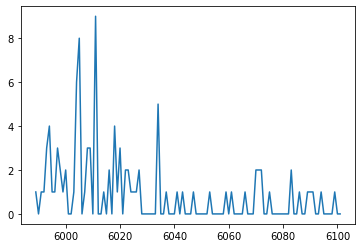

In [20]:
plt.plot(df.loc[df.province=='Tak', 'wv_count'])
plt.title(prov)
plt.show()

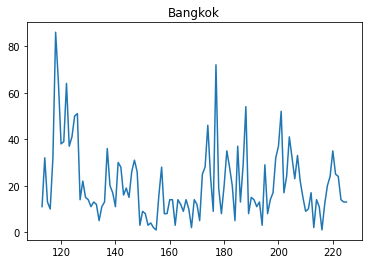

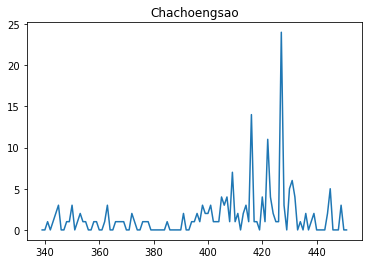

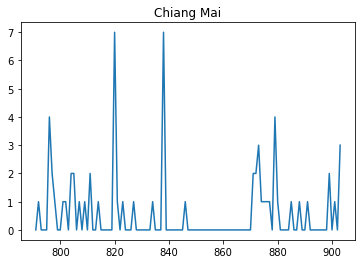

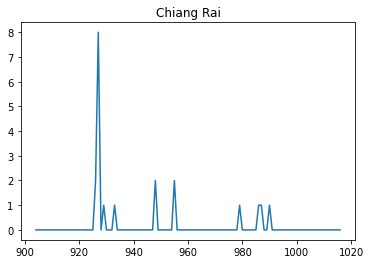

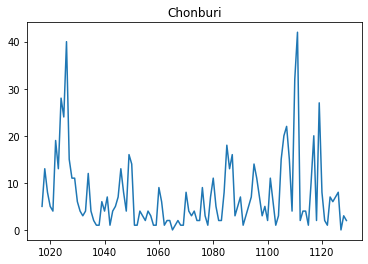

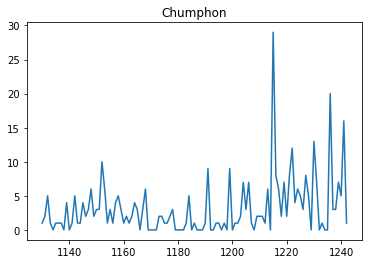

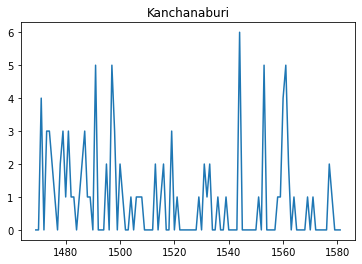

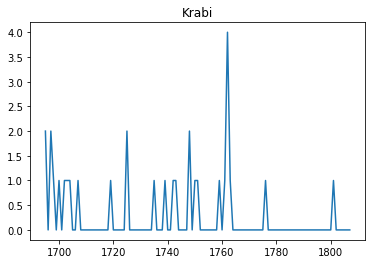

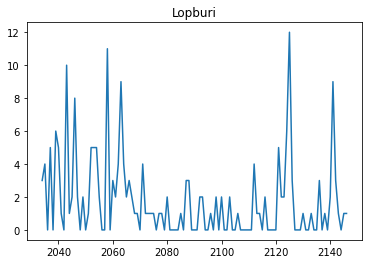

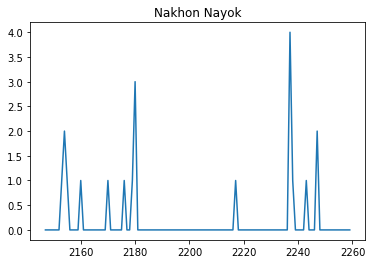

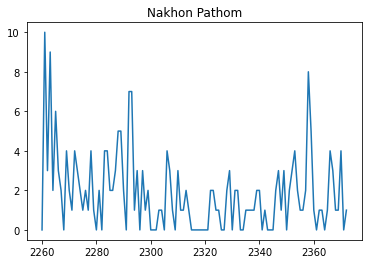

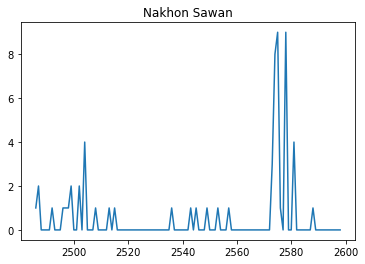

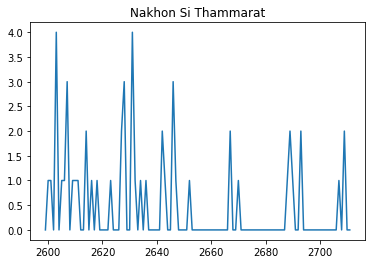

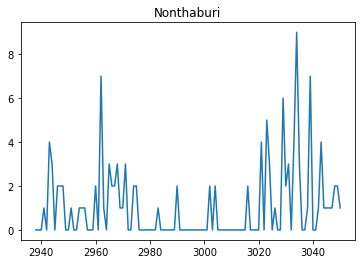

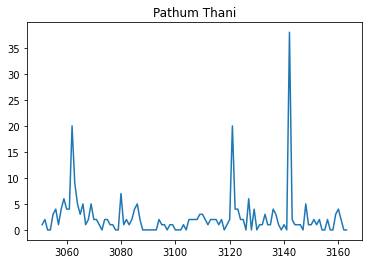

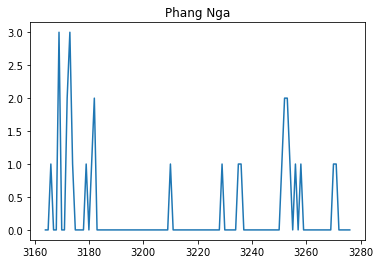

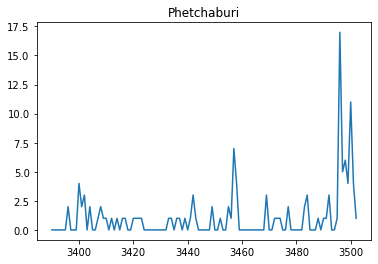

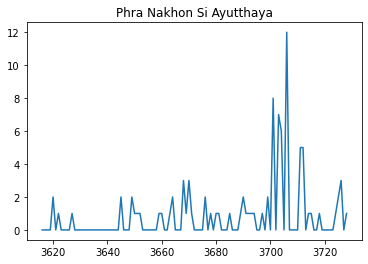

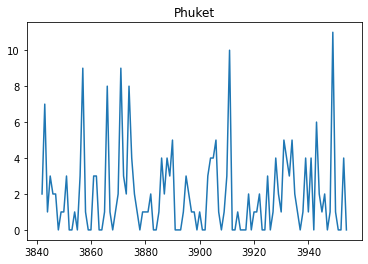

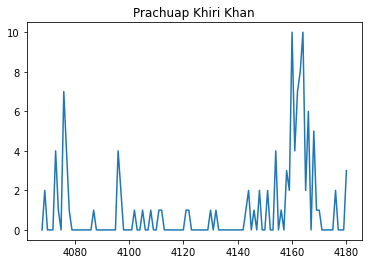

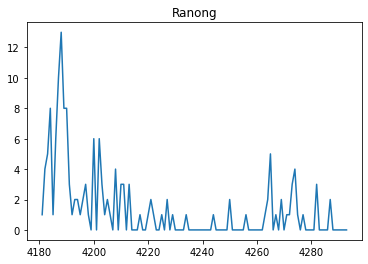

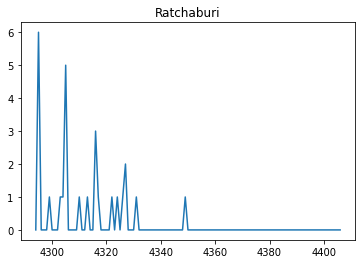

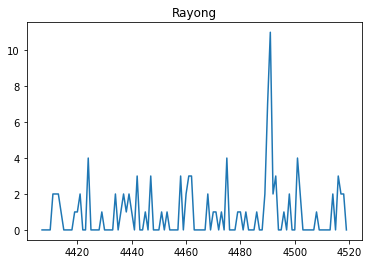

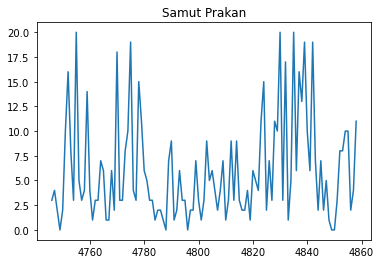

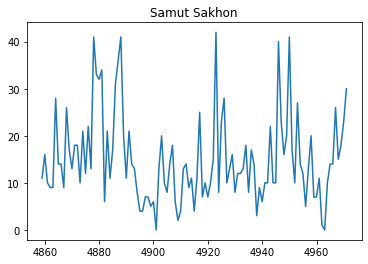

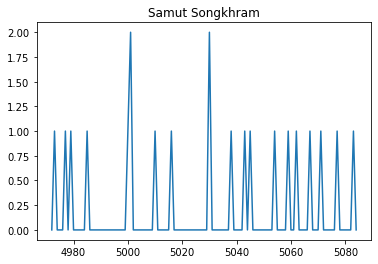

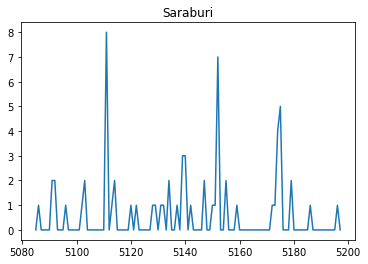

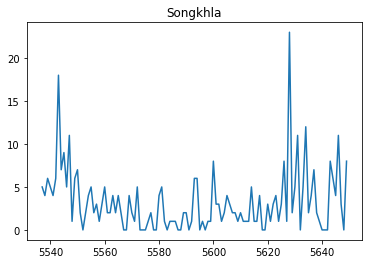

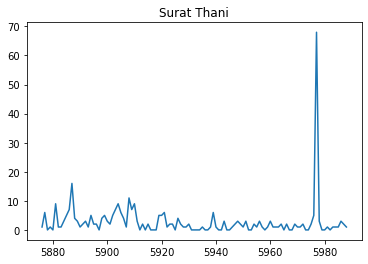

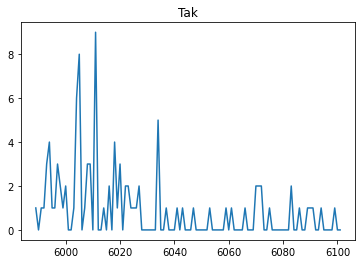

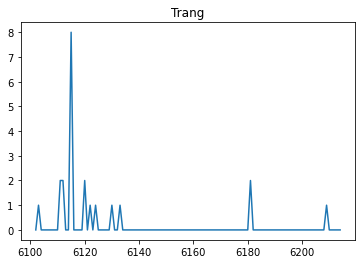

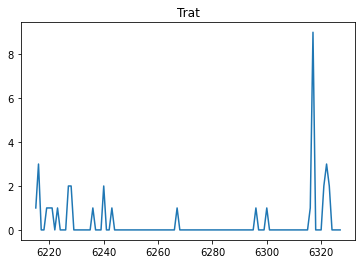

In [21]:
for prov in lg_provs:
    data = df.loc[df.province==prov, 'wv_count']
    plt.plot(data)
    plt.title(prov)
    plt.show()

In [24]:
by_prov_counts['Ratchaburi'], by_prov_counts['Trang'], by_prov_counts['Trat']

(27.0, 22.0, 36.0)